In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

%matplotlib notebook

import keras

from keras.layers import Convolution2D, Flatten, Dense, MaxPool2D, Activation, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import np_utils

In [32]:
dirs = os.listdir('/Users/ishpreet/Documents/Images/')
path = '/Users/ishpreet/Documents/Images/'

In [46]:
def pre(X):
  #Convert to grayscale, e.g. single channel Y
    X = 0.299 * X[:, :,  0] + 0.587 * X[:, :,  1] + 0.114 * X[:, :,  2]
  
#   print(X)
#   X = cv2.cvtColor(X,cv2.COLOR_BGR2YCR_CB)
  
#   X = X[:][:][:][0]
  #Scale features to be in [0, 1]
    X = (X / 255.).astype(np.float32)

#   for i in range(X.shape[0]):
#       with warnings.catch_warnings():
#           warnings.simplefilter("ignore")
#           X[i] = exposure.equalize_adapthist(X[i])
#       print_progress(i + 1, X.shape[0])

 

  # Add a single grayscale channel
#   X = X.reshape(X.shape + (1,)) 
  
    return X

In [54]:
lanc = 0
imgarr = []
c = 0
#fl = 0
#chim=[]
lab = []

for i in dirs:
    
    if(i[0]=='.'):
        continue

#     print(i)
    
    st = path+i
    
    c = c+1

    
    for j in os.listdir(st):
        
        
        if(j[0]=='.'):
            continue
        if (j[-3:] != 'ppm'):
            continue
            
        
            
        st2 = st+'/'+j
        img = cv2.imread(st2,cv2.COLOR_BGR2RGB)
        #print (img.shape)
        
        labs = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)

        lab_planes = cv2.split(labs)

        clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(10,10))

        lab_planes[0] = clahe.apply(lab_planes[0])

        labs = cv2.merge(lab_planes)

        img = cv2.cvtColor(labs, cv2.COLOR_LAB2RGB)

        
#         img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        
#         print(img.shape)
        
        img = pre(img)
        
        img = cv2.resize(img, (32, 32))
        
        
      
#         plt.imshow(img)
#         print(img.shape)
#         break
#         img = img.astype('uint8')
        imgarr.append(img)
    
        lab.append(c)
#         if(j[0]=='.'):
#             continue
#         if (j[-3:] == 'csv'):
#             continue
            
#         st2 = st+'/'+j
#         img = cv2.imread(st2)
# #         print (img.shape)
        
#         img = cv2.resize(img, (32, 32))
        
#         img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
# #         plt.imshow(img)
# #         print(img.shape)
# #         break
#         img = img.astype('uint8')
#         imgarr.append(img)
    
#         lab.append(i)

In [49]:
imgarr[110].shape

(32, 32)

In [50]:
len(imgarr)

39209

In [51]:
lab = np_utils.to_categorical(lab)
lab.shape

(39209, 44)

In [25]:
imgarr = np.array(imgarr)

In [26]:
imgarr.shape

(39209, 32, 32, 3)

In [10]:
imgarr = np.array(imgarr).reshape((len(imgarr), 32, 32, 1))

<IPython.core.display.Javascript object>


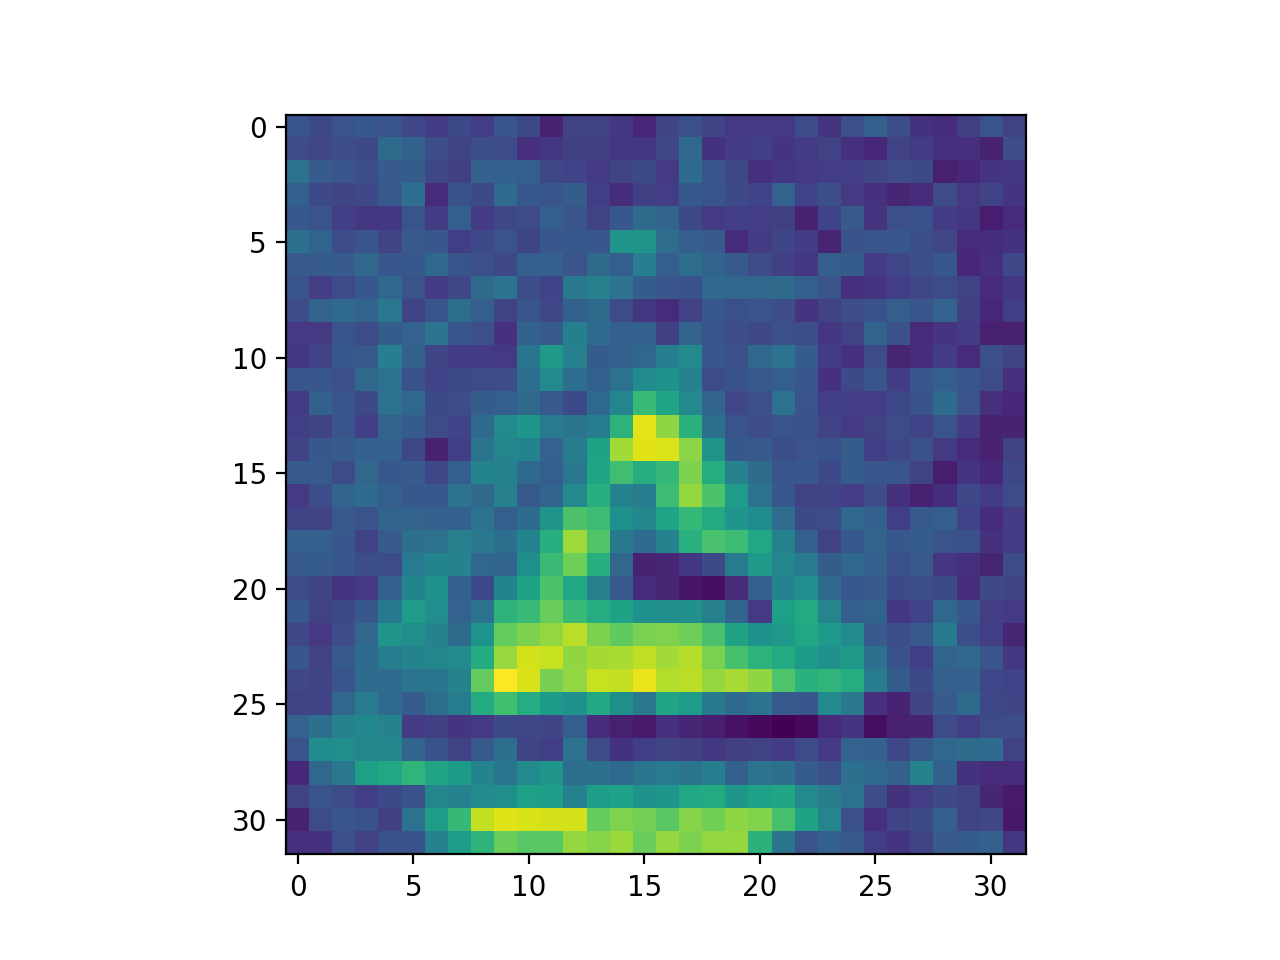

In [56]:
plt.imshow(imgarr[200])

In [49]:
model = Sequential()

model.add(Convolution2D(64, (3, 3), input_shape=(32, 32, 1)))
model.add(Activation('relu'))

model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(16, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Convolution2D(8, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dropout(0.4))

model.add(Dense(lab.shape[1]))
model.add(Activation('softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        18464     
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 16)        4624      
_________________________________________________________________
activation_3 (Activation)    (None, 12, 12, 16)        0         
__________

In [50]:
hist = model.fit(imgarr, lab,
                epochs=20,
                shuffle=True,
                batch_size=100,
                validation_split=0.2)

Train on 31367 samples, validate on 7842 samples
Epoch 1/20
31367/31367 [==============================] - 37s 1ms/step - loss: 3.6921 - acc: 0.0684 - val_loss: 3.9922 - val_acc: 0.0000e+00
Epoch 2/20
31367/31367 [==============================] - 36s 1ms/step - loss: 3.5033 - acc: 0.0684 - val_loss: 4.2317 - val_acc: 0.0000e+00
Epoch 3/20
31367/31367 [==============================] - 36s 1ms/step - loss: 3.4060 - acc: 0.0700 - val_loss: 4.4673 - val_acc: 0.0000e+00
Epoch 4/20
31367/31367 [==============================] - 37s 1ms/step - loss: 3.3474 - acc: 0.0707 - val_loss: 4.6891 - val_acc: 0.0000e+00
Epoch 5/20
31367/31367 [==============================] - 39s 1ms/step - loss: 3.3118 - acc: 0.0701 - val_loss: 4.8928 - val_acc: 0.0000e+00
Epoch 6/20
31367/31367 [==============================] - 37s 1ms/step - loss: 3.2894 - acc: 0.0712 - val_loss: 5.0794 - val_acc: 0.0000e+00
Epoch 7/20
31367/31367 [==============================] - 36s 1ms/step - loss: 3.2746 - acc: 0.0713 - val

KeyboardInterrupt: 

In [29]:
cnn4 = Sequential()
cnn4.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn4.add(BatchNormalization())

cnn4.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Flatten())

cnn4.add(Dense(256, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.5))

cnn4.add(Dense(128, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.5))

cnn4.add(Dense(lab.shape[1], activation='softmax'))

sgd = keras.optimizers.SGD(lr=0.5)

cnn4.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [30]:
hist = cnn4.fit(imgarr, lab,
                epochs=50,
                shuffle=True,
                batch_size=100,
                validation_split=0.2)

Train on 31367 samples, validate on 7842 samples
Epoch 1/50
11000/31367 [=========>....................] - ETA: 1:17 - loss: 2.8931 - acc: 0.2807

KeyboardInterrupt: 

In [15]:
dir(cnn4)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_inbound_node',
 '_base_init',
 '_build_input_shape',
 '_built',
 '_check_trainable_weights_consistency',
 '_collected_trainable_weights',
 '_compute_previous_mask',
 '_expects_training_arg',
 '_feed_input_names',
 '_feed_input_shapes',
 '_feed_inputs',
 '_feed_loss_fns',
 '_feed_output_names',
 '_feed_output_shapes',
 '_feed_outputs',
 '_feed_sample_weight_modes',
 '_feed_sample_weights',
 '_feed_targets',
 '_function_kwargs',
 '_get_node_attribute_at_index',
 '_inbound_nodes',
 '_init_graph_network',
 '_init_subclassed_network',
 '_initial_weights',
 '_input_coordinate